# 관계/비관계 분류

In [ ]:
pip install tensorflow

In [ ]:
import pandas as pd 
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import * 
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os 

In [ ]:
# sample for testset
data = {"id": list(range(1, 183)), "label": [0]*182}
df = pd.DataFrame(data)

# 비어있는 라벨 데이터[0] csv 파일로 저장
df.to_csv("/content/drive/MyDrive/ttproject/Sequential/선정성/관계/sample.csv", index=False)

In [ ]:
# 경로 설정 - 관계/비관계 trainset, 각각 660개씩 합쳐져있는 폴더
path = "/content/drive/MyDrive/ttproject/Sequential/선정성/관계/관계train"
files = os.listdir(path)

for file in files:
    if file == ".DS_Store":
        os.remove(os.path.join(dpath, file))

In [ ]:
# 데이터 형상 관련 상수 정의 
IMAGE_WIDTH = 216
IMAGE_HEIGHT = 216
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNEL = 3

In [ ]:
# 학습 데이터 준비 
filenames = os.listdir(path)

df = pd.DataFrame(
    {"filename":sorted(filenames),
    "category":0}
)      
df

,filename,category
0,관계이미지001.jpg,0
1,관계이미지002.jpg,0
2,관계이미지003.jpg,0
3,관계이미지004.jpg,0
4,관계이미지005.jpg,0
...,...,...
1315,비관계이미지656.jpg,0
1316,비관계이미지657.jpg,0
1317,비관계이미지658.jpg,0
1318,비관계이미지659.jpg,0


In [ ]:
# 관계=1, 비관계= 0으로 정답 레이블 (category) 생성
df.loc[:659, "category"] = 1

sexual_rows = df[df["category"] == 1]
print(sexual_rows)

               filename  category
0    관계이미지001.jpg         1
1    관계이미지002.jpg         1
2    관계이미지003.jpg         1
3    관계이미지004.jpg         1
4    관계이미지005.jpg         1
..                  ...       ...
655  관계이미지656.jpg         1
656  관계이미지657.jpg         1
657  관계이미지658.jpg         1
658  관계이미지659.jpg         1
659  관계이미지660.jpg         1

[660 rows x 2 columns]


In [ ]:
# 확인 
nonsexual_rows = df[df["category"] == 0]
print(nonsexual_rows)

df

                  filename  category
660   비관계이미지001.jpg         0
661   비관계이미지002.jpg         0
662   비관계이미지003.jpg         0
663   비관계이미지004.jpg         0
664   비관계이미지005.jpg         0
...                    ...       ...
1315  비관계이미지656.jpg         0
1316  비관계이미지657.jpg         0
1317  비관계이미지658.jpg         0
1318  비관계이미지659.jpg         0
1319  비관계이미지660.jpg         0

[660 rows x 2 columns]


,filename,category
0,관계이미지001.jpg,1
1,관계이미지002.jpg,1
2,관계이미지003.jpg,1
3,관계이미지004.jpg,1
4,관계이미지005.jpg,1
...,...,...
1315,비관계이미지656.jpg,0
1316,비관계이미지657.jpg,0
1317,비관계이미지658.jpg,0
1318,비관계이미지659.jpg,0


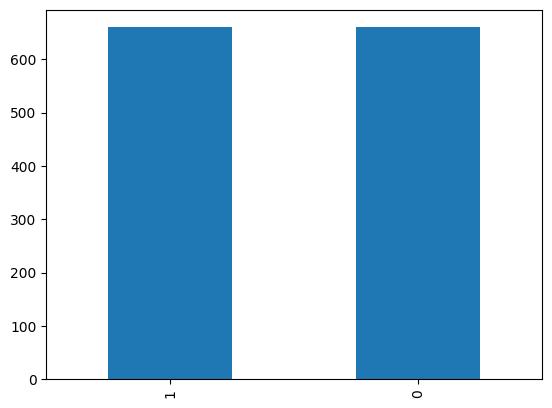

In [ ]:
df['category'].value_counts().plot.bar()
plt.show()

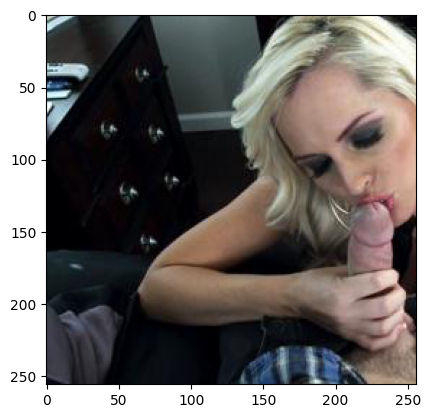

In [ ]:
%matplotlib inline
from tensorflow.keras.preprocessing.image import load_img

# 샘플 이미지 불러오기
sample = random.choice(filenames)
img_path = os.path.join(path, sample)
image = load_img(img_path)
plt.imshow(image)

In [ ]:
# 배치정규화(Batch Normalization): 신경망 입력 데이터를 평균 : 0 , 분산: 1로 정규화를 해서 학습이 잘 이루어지도록 하는 방법 

# 모델 생성

from keras.models import Sequential
from keras.layers import * 

In [ ]:
# 레이어 1
model = Sequential()
model.add(Conv2D(32, (3,3), activation="relu", input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH , IMAGE_CHANNEL)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 레이어 2 
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 레이어3
model.add(Conv2D(128, (3,3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
          
# Fully Connected 
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(2,activation="softmax"))

In [ ]:
# 모델 실행 옵션 
model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 214, 214, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 214, 214, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 107, 107, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 107, 107, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 105, 105, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 105, 105, 64)     2

In [ ]:
# reduceLROnPlateau: 모델의 정확도가 향상되지 않는 경우 ㅡ learning rate (lr) 을 줄여주는 클래스
# : callback 함수의 일종, learning rate가 더이상 업데이트가 되지 않으면, 학습을 중단해라
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

earlystop = EarlyStopping(patience=10)
learning_rate_reduction=ReduceLROnPlateau(
                        monitor= "val_accuracy", 
                        patience = 2, 
                        factor = 0.5, 
                        min_lr=0.0001,
                        verbose=1)
                        
callbacks = [earlystop, learning_rate_reduction]

In [ ]:
# 이미지 제너레이터에서 class_mode = "categorical"로 지정하기 위해 컬럼 카테고리를 스트링으로 변경함. 
df['category']=df['category'].replace({0:'비관계',1:"관계"})

In [ ]:
# test, validate 데이터 분리
# 비율 7:3으로 조정
train_df, validate_df = train_test_split(df , test_size=0.3, random_state= 42)

train_df=train_df.reset_index(drop=True)
validate_df=validate_df.reset_index(drop=True)

In [ ]:
train_df['category'].value_counts()

비관계    467
관계     457
Name: category, dtype: int64

In [ ]:
validate_df['category'].value_counts()

관계     203
비관계    193
Name: category, dtype: int64

In [ ]:
total_train=train_df.shape[0]
total_validate=validate_df.shape[0]
batch_size=8

# 트레이닝 데이터의 제너레이터 설정 
train_datagen=ImageDataGenerator(
        rotation_range=15,
        rescale=1./255,
        shear_range=0.1,
        zoom_range=0.2,
        horizontal_flip=True,
        width_shift_range=0.1, 
        height_shift_range=0.1)
        
train_generator=train_datagen.flow_from_dataframe(
    train_df, 
    path,
    x_col = "filename", 
    y_col = "category",
    target_size = IMAGE_SIZE,
    class_mode = "categorical",
    batch_size = batch_size )
    
validate_datagen=ImageDataGenerator(rescale=1./255)
# 검증이미지니까, 사진 그대로 쓰겠다. 

validation_generator=validate_datagen.flow_from_dataframe(
    validate_df,
    path,
    x_col= "filename",
    y_col= "category",
    target_size = IMAGE_SIZE,
    class_mode = "categorical",
    batch_size = batch_size )

Found 924 validated image filenames belonging to 2 classes.
Found 396 validated image filenames belonging to 2 classes.


In [ ]:
# 샘플 데이터 확인
example_df=train_df.sample(n=1).reset_index(drop=True)
example_df

,filename,category
0,관계이미지569.jpg,관계


In [ ]:
example_generator = train_datagen.flow_from_dataframe(
                    example_df,
                    path,
                    x_col = "filename",
                    y_col = "category",
                    target_size = IMAGE_SIZE,
                    class_mode = "categorical")

Found 1 validated image filenames belonging to 1 classes.


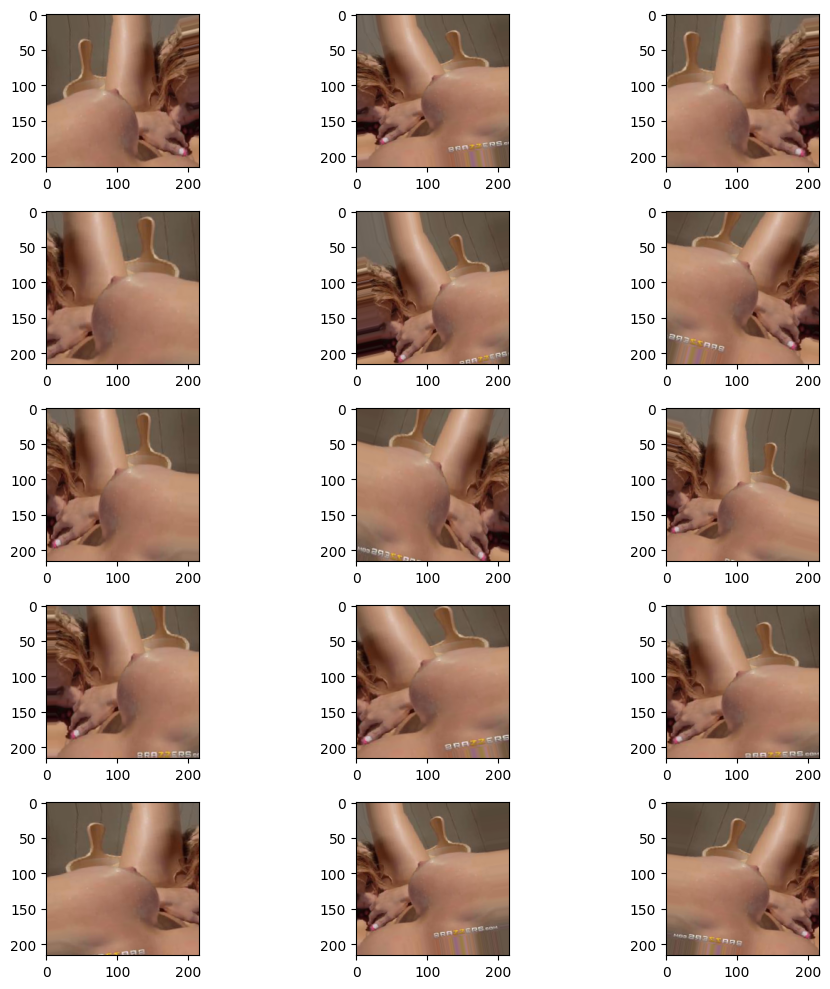

In [ ]:
plt.figure(figsize=(10,10))
for i in range(0,15):
    plt.subplot(5,3,i+1)
    for xBatch, yBatch in example_generator:
        image = xBatch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [ ]:
from PIL import Image, ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
# 가장 높은 성능의 모델을 저장
# 콜백값에 추가해서 EarlyStopping, ReduceLROnPlateau랑 같이 사용
# 그러면 학습 중에 성능 향상이 없는 경우 조기 종료하고, 학습률을 조정하면서, 가장 좋은 성능의 모델 가중치를 저장할 수 있다!
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("weights.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

callbacks = [earlystop, learning_rate_reduction, checkpoint]

## 모델 학습 

In [ ]:
# 트레이닝
epochs = 50

history = model.fit(
    train_generator, 
    epochs = epochs, 
    steps_per_epoch = total_train//batch_size ,
    validation_data=  validation_generator,
    validation_steps = total_validate//batch_size,
    callbacks = callbacks,
)

# 모델 저장 
model.save("/content/drive/MyDrive/ttproject/Sequential/선정성/관계/seq_sexual_model.h5")


## truncated = True로 설정

Epoch 1/50
115/115 [==============================] - ETA: 0s - loss: 0.9182 - accuracy: 0.7391
Epoch 1: val_accuracy improved from -inf to 0.50765, saving model to weights.h5
115/115 [==============================] - 30s 211ms/step - loss: 0.9182 - accuracy: 0.7391 - val_loss: 6.3222 - val_accuracy: 0.5077 - lr: 0.0010
Epoch 2/50
115/115 [==============================] - ETA: 0s - loss: 0.6384 - accuracy: 0.7882
Epoch 2: val_accuracy improved from 0.50765 to 0.52296, saving model to weights.h5
115/115 [==============================] - 25s 214ms/step - loss: 0.6384 - accuracy: 0.7882 - val_loss: 2.1279 - val_accuracy: 0.5230 - lr: 0.0010
Epoch 3/50
115/115 [==============================] - ETA: 0s - loss: 0.5204 - accuracy: 0.7838
Epoch 3: val_accuracy improved from 0.52296 to 0.71684, saving model to weights.h5
115/115 [==============================] - 23s 197ms/step - loss: 0.5204 - accuracy: 0.7838 - val_loss: 0.5544 - val_accuracy: 0.7168 - lr: 0.0010
Epoch 4/50
115/115 [=====

## 트레이닝 모델 히스토리 시각화

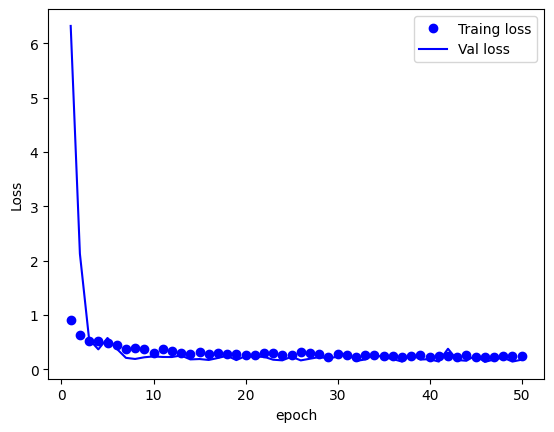

In [ ]:
# 트레이닝 모델 히스토리 시각화 

historyDict=history.history

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

%matplotlib inline
epo = range(1, len(acc)+1)
plt.plot(epo, loss, 'bo', label="Traing loss")
plt.plot(epo, val_loss, 'b', label="Val loss")
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

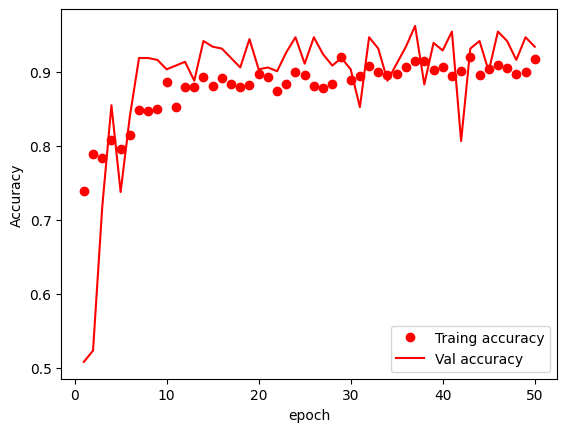

In [ ]:
%matplotlib inline
plt.plot(epo, acc, 'ro', label="Traing accuracy")
plt.plot(epo, val_acc, 'r', label="Val accuracy")
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## 과적합 확인

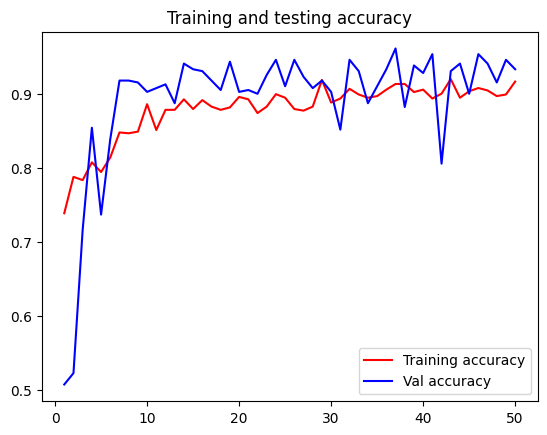

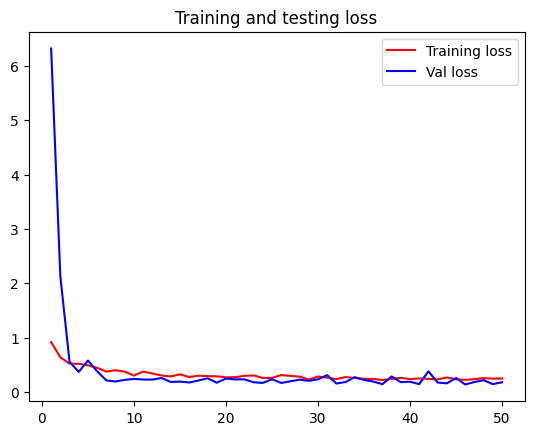

In [ ]:
# 과적합 확인용
from matplotlib import pyplot as plt

plt.plot(epo, acc, 'r', label='Training accuracy')
plt.plot(epo, val_acc, 'b', label='Val accuracy')
plt.title('Training and testing accuracy')
plt.legend()
plt.figure()

plt.plot(epo, loss, 'r', label='Training loss')
plt.plot(epo, val_loss, 'b', label='Val loss')
plt.title('Training and testing loss')
plt.legend()

plt.show()

In [ ]:
# 모델 불러오기
from tensorflow.keras.models import load_model
model = load_model("/content/drive/MyDrive/ttproject/Sequential/선정성/관계/seq_sexual_model.h5")

### 최종 모델

- Epoch 37

- accuracy: 0.9138 
- val_accuracy: 0.9617 
- loss: 0.2201 
- val_loss: 0.1435 

- lr: 1.0000e-04